# Setup

In [26]:
pip install -r requirements.txt


     ---------------------------------------- 7.6/7.6 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 KB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


You should consider upgrading via the 'C:\Users\maks_\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import json
import pandas as pd
import locale

# Data preparation

In [3]:
train_url = 'https://raw.githubusercontent.com/sonodug/NER/main/data/train.json'
test_url = 'https://raw.githubusercontent.com/sonodug/NER/main/data/test.json'

train_df  = pd.read_json(train_url)
test_df = pd.read_json(test_url)

In [4]:
train_df.head()

,id,text,label,extracted_part
0,809436509,Извещение о проведении открытого конкурса в эл...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
1,854885310,ТРЕБОВАНИЯ К СОДЕРЖАНИЮ ЗАЯВКИ участника запро...,обеспечение исполнения контракта,{'text': ['Поставщик должен предоставить обесп...
2,4382157,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
3,184555082,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
4,211645258,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...


In [5]:
test_df.head()

,id,text,label
0,762883279,МУНИЦИПАЛЬНЫЙ КОНТРАКТ № ______ на оказание ус...,обеспечение исполнения контракта
1,311837655,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта
2,540954893,Идентификационный код закупки: 222633005300163...,обеспечение исполнения контракта
3,274660397,Идентификационный код закупки: 222631202689463...,обеспечение исполнения контракта
4,732742591,Идентификационный код закупки: 222637800031163...,обеспечение исполнения контракта


In [6]:
len(train_df["text"].values)

1799

In [7]:
len(test_df["text"].values)

318

In [8]:
locale.getpreferredencoding = lambda: "UTF-8"

# NER with spaCy's pretrained model 

In [9]:
import spacy
from spacy import displacy

In [10]:
!python -m spacy download ru_core_news_sm

     ---------------------------------------- 15.3/15.3 MB 6.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


You should consider upgrading via the 'C:\Users\maks_\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [11]:
nlp = spacy.load('ru_core_news_sm')
ner = nlp.get_pipe("ner")

nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [12]:
ner.labels

('LOC', 'ORG', 'PER')

In [13]:
ex_text = """В 1999 году я побывал в Париже и посетил Эйфелеву башню. Там было много туристов, и я сделал много фотографий.
Вечером мы с моим другом Владимиром пошли в ресторан и заказали французский сыр и красное вино. 
Потом мы прогулялись по набережной Сены и наслаждались красивым видом на город.
Вообще, Париж очень интересный город, и я был рад, что смог побывать там."""
doc = nlp(ex_text)

# The NER pipeline component tags entities in the doc with various attributes
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Париже 24 30 LOC
Эйфелеву башню 41 55 LOC
Владимиром 136 146 PER
Сены 243 247 LOC
Париж 296 301 LOC


In [14]:
# Use displacy to visualize entities
displacy.render(doc, style='ent', jupyter=True)

In [15]:
formatted_data = []

for index, row in train_df.iterrows():
    text = row['text']
    entities = []
    for i in range(len(row['extracted_part']['text'])):
      start = row['extracted_part']['answer_start'][0]
      end = row['extracted_part']['answer_end'][0]
      label = row['label']
      entities.append((start, end, label))
    formatted_data.append((text, {"entities": entities}))

print(formatted_data[0])

('Извещение о проведении открытого конкурса в электронной форме для закупки №0328300032822000806 Общая информация Номер извещения 0328300032822000806 Наименование объекта закупки Поставка продуктов питания Способ определения поставщика (подрядчика, исполнителя) Открытый конкурс в бль Порядок внесения денежных средств в качестве обеспечения заявки на участие в закупке, а также условия гарантии Обеспечение заявки на участие в закупке может предоставляться участником закупки в виде денежных средств или независимой гарантии, предусмотренной ст. 45 Федерального закона № 44-ФЗ. Выбор способа обеспечения осуществляется участником закупки самостоятельно. Срок действия независимой гарантии должен составлять не менее месяца с даты окончания срока подачи заявок. Обеспечение заявки на участие в закупке предоставляется в соответствии с ч. 5 ст. 44 Федерального закона № 44-ФЗ. Условия независимой гарантии в соответствии со ст. 45 Федерального закона № 44-ФЗ. Реквизиты счета в соответствии с п.16 ч. 

In [16]:
for _, annotations in formatted_data:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [17]:
ner.labels

('LOC',
 'ORG',
 'PER',
 'обеспечение гарантийных обязательств',
 'обеспечение исполнения контракта')

In [18]:
move_names = list(ner.move_names)
move_names

['B-ORG',
 'B-PER',
 'B-LOC',
 'I-ORG',
 'I-PER',
 'I-LOC',
 'L-ORG',
 'L-PER',
 'L-LOC',
 'U-ORG',
 'U-PER',
 'U-LOC',
 'O',
 'B-обеспечение исполнения контракта',
 'I-обеспечение исполнения контракта',
 'L-обеспечение исполнения контракта',
 'U-обеспечение исполнения контракта',
 'B-обеспечение гарантийных обязательств',
 'I-обеспечение гарантийных обязательств',
 'L-обеспечение гарантийных обязательств',
 'U-обеспечение гарантийных обязательств']

# Train a custom model

In [19]:
iterations = 24

loss_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
data = []

In [21]:
%%time

import random
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.training.example import Example
from tqdm import tqdm
from spacy.scorer import Scorer
import warnings

pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):
  warnings.filterwarnings("ignore", category=UserWarning, module='spacy') 
  scorer = Scorer()
  # Training for 30 iterations
  for iteration in range(1, iterations):
    # shuffling examples before every iteration
    examples = []
    random.shuffle(formatted_data)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(formatted_data, size=compounding(4.0, 32.0, 1.001))
    progress_bar = tqdm(total=len(formatted_data), bar_format='{l_bar}{bar:20}{r_bar}{bar:-10b}', 
                        desc=f"Iteration {iteration}", leave=False)
    for batch in batches:
      for text, annotations in batch:
        doc = nlp.make_doc(text)
        predict = nlp(text)
        ex = Example.from_dict(predict, annotations)
        example = Example.from_dict(doc, annotations)
        ex.predicted = nlp(str(ex.predicted))
        examples.append(ex)
        nlp.update([example], losses=losses, drop=0.3)
        tqdm._instances.clear()
        progress_bar.update(1)

    metrics = scorer.score_spans(examples, "ents")
    print("Precision: {} Recall: {} F1-score: {}".format(metrics['ents_p'],
                                                                     metrics['ents_r'],
                                                                     metrics['ents_f']))
    loss_scores.append(losses['ner'])
    precision_scores.append(metrics['ents_p'])
    recall_scores.append(metrics['ents_r'])
    f1_scores.append(metrics['ents_f'])
    data.append([iteration, losses['ner'], metrics['ents_p'], metrics['ents_r'], metrics['ents_f']])
    print('  Losses:', losses['ner'])
    print()
    examples = []

Iteration 1: 100%|████████████████████| 1799/1799 [03:32<00:00,  9.54it/s]                                                                                                                                                             

Precision: 0.4776978417266187 Recall: 0.4529331514324693 F1-score: 0.4649859943977591
  Losses: 7327.532504245074



Iteration 2: 100%|████████████████████| 1799/1799 [03:37<00:00,  8.23it/s]                                                                                                                                                             

Precision: 0.6257545271629779 Recall: 0.6364256480218281 F1-score: 0.6310449780182616
  Losses: 2559.9723443017974



Iteration 3: 100%|████████████████████| 1799/1799 [03:35<00:00,  8.42it/s]                                                                                                                                                             

Precision: 0.6706746826987308 Recall: 0.684856753069577 F1-score: 0.6776915288558893
  Losses: 2813.439073239103



Iteration 4: 100%|████████████████████| 1799/1799 [03:37<00:00,  8.26it/s]                                                                                                                                                             

Precision: 0.6946308724832215 Recall: 0.7060027285129604 F1-score: 0.7002706359945873
  Losses: 2061.991968801733



Iteration 5: 100%|████████████████████| 1799/1799 [03:38<00:00,  8.08it/s]                                                                                                                                                             

Precision: 0.718936877076412 Recall: 0.73806275579809 F1-score: 0.7283742847526086
  Losses: 2254.3092186634512



Iteration 6: 100%|████████████████████| 1799/1799 [03:43<00:00,  8.43it/s]                                                                                                                                                             

Precision: 0.7243207422133864 Recall: 0.7455661664392906 F1-score: 0.7347899159663867
  Losses: 2987.1110055677605



Iteration 7: 100%|████████████████████| 1799/1799 [03:36<00:00,  7.30it/s]                                                                                                                                                             

Precision: 0.747843397478434 Recall: 0.7687585266030014 F1-score: 0.7581567440295996
  Losses: 1787.0647132499316



Iteration 8: 100%|████████████████████| 1799/1799 [03:37<00:00,  8.27it/s]                                                                                                                                                             

Precision: 0.7688207861425717 Recall: 0.7871759890859482 F1-score: 0.7778901247050893
  Losses: 2428.8776499093005



Iteration 9: 100%|████████████████████| 1799/1799 [03:37<00:00,  8.40it/s]                                                                                                                                                             

Precision: 0.7712374581939799 Recall: 0.786493860845839 F1-score: 0.778790949003715
  Losses: 2023.1574794062944



Iteration 10: 100%|████████████████████| 1799/1799 [03:33<00:00,  8.99it/s]                                                                                                                                                            

Precision: 0.7727873183619551 Recall: 0.7980900409276944 F1-score: 0.785234899328859
  Losses: 2891.157825311995



Iteration 11: 100%|████████████████████| 1799/1799 [03:33<00:00,  8.03it/s]                                                                                                                                                            

Precision: 0.7829301075268817 Recall: 0.7946793997271487 F1-score: 0.7887610020311442
  Losses: 2735.0396431571376



Iteration 12: 100%|████████████████████| 1799/1799 [03:34<00:00,  8.63it/s]                                                                                                                                                            

Precision: 0.7927321668909825 Recall: 0.8035470668485676 F1-score: 0.7981029810298104
  Losses: 2801.5042009289773



Iteration 13: 100%|████████████████████| 1799/1799 [03:34<00:00,  8.31it/s]                                                                                                                                                            

Precision: 0.7903118779031187 Recall: 0.8124147339699863 F1-score: 0.8012108980827446
  Losses: 3579.726275587975



Iteration 14: 100%|████████████████████| 1799/1799 [03:32<00:00,  8.80it/s]                                                                                                                                                            

Precision: 0.808338937457969 Recall: 0.819918144611187 F1-score: 0.8140873687775144
  Losses: 3057.4661654199754



Iteration 15: 100%|████████████████████| 1799/1799 [03:32<00:00,  9.29it/s]                                                                                                                                                            

Precision: 0.8106111484217595 Recall: 0.8233287858117326 F1-score: 0.8169204737732656
  Losses: 2765.5187284448953



Iteration 16: 100%|████████████████████| 1799/1799 [03:33<00:00,  7.94it/s]                                                                                                                                                            

Precision: 0.7974513749161637 Recall: 0.8110504774897681 F1-score: 0.8041934392965845
  Losses: 3185.7083878778035



Iteration 17: 100%|████████████████████| 1799/1799 [03:38<00:00,  8.75it/s]                                                                                                                                                            

Precision: 0.8137977227059612 Recall: 0.8287858117326057 F1-score: 0.8212233862791484
  Losses: 3092.451325213104



Iteration 18: 100%|████████████████████| 1799/1799 [03:40<00:00,  7.43it/s]                                                                                                                                                            

Precision: 0.8209054593874834 Recall: 0.8410641200545702 F1-score: 0.8308625336927223
  Losses: 3107.4914100504197



Iteration 19: 100%|████████████████████| 1799/1799 [03:47<00:00,  8.12it/s]                                                                                                                                                            

Precision: 0.8043766578249337 Recall: 0.8274215552523875 F1-score: 0.8157363819771352
  Losses: 2530.286037780257



Iteration 20: 100%|████████████████████| 1799/1799 [03:50<00:00,  8.24it/s]                                                                                                                                                            

Precision: 0.8132013201320132 Recall: 0.8403819918144612 F1-score: 0.8265682656826568
  Losses: 3031.1311333662725



Iteration 21: 100%|████████████████████| 1799/1799 [04:08<00:00,  7.12it/s]                                                                                                                                                            

Precision: 0.8194444444444444 Recall: 0.845156889495225 F1-score: 0.8321020819341839
  Losses: 2594.5558218690576



Iteration 22: 100%|████████████████████| 1799/1799 [03:38<00:00,  7.64it/s]                                                                                                                                                            

Precision: 0.8239625167336011 Recall: 0.839699863574352 F1-score: 0.8317567567567568
  Losses: 2732.2994364383767



Iteration 23: 100%|████████████████████| 1799/1799 [03:38<00:00,  8.41it/s]                                                                                                                                                            

Precision: 0.8300132802124834 Recall: 0.8526603001364257 F1-score: 0.8411843876177657
  Losses: 2749.3394911025025

CPU times: total: 1h 24min 28s
Wall time: 1h 24min 40s


# Evaluate model perfomance

In [27]:
from tabulate import tabulate
headers = ["Itn", "NER Loss", "Ents P", "Ents R", "Ents F"]

print(tabulate(data, headers))

  Itn    NER Loss    Ents P    Ents R    Ents F
-----  ----------  --------  --------  --------
    1     7327.53  0.477698  0.452933  0.464986
    2     2559.97  0.625755  0.636426  0.631045
    3     2813.44  0.670675  0.684857  0.677692
    4     2061.99  0.694631  0.706003  0.700271
    5     2254.31  0.718937  0.738063  0.728374
    6     2987.11  0.724321  0.745566  0.73479
    7     1787.06  0.747843  0.768759  0.758157
    8     2428.88  0.768821  0.787176  0.77789
    9     2023.16  0.771237  0.786494  0.778791
   10     2891.16  0.772787  0.79809   0.785235
   11     2735.04  0.78293   0.794679  0.788761
   12     2801.5   0.792732  0.803547  0.798103
   13     3579.73  0.790312  0.812415  0.801211
   14     3057.47  0.808339  0.819918  0.814087
   15     2765.52  0.810611  0.823329  0.81692
   16     3185.71  0.797451  0.81105   0.804193
   17     3092.45  0.813798  0.828786  0.821223
   18     3107.49  0.820905  0.841064  0.830863
   19     2530.29  0.804377  0.827422  0.81

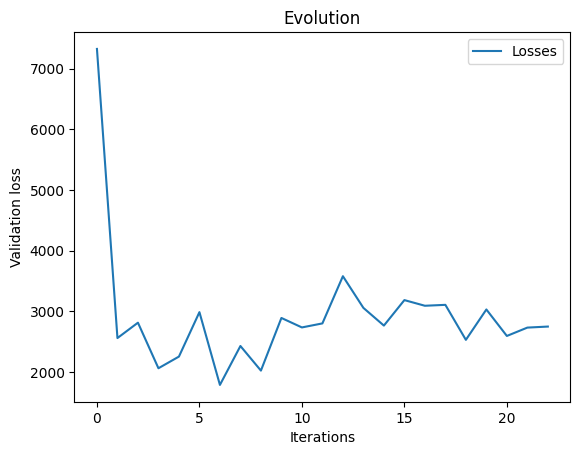

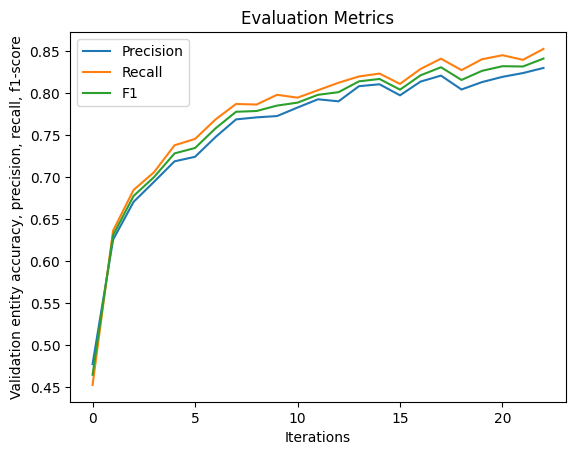

In [30]:
import matplotlib.pyplot as plt

# Plot losses
pl_losses = {'Losses': loss_scores}
for name, values in pl_losses.items():
  plt.plot(range(len(values)), values, label=name)
plt.title('Evolution')
plt.xlabel('Iterations')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

# Plot evaluation metrics
pl_metrics = {'Precision': precision_scores, 'Recall': recall_scores, 'F1': f1_scores}
for metric_name, metric_values in pl_metrics.items():
    plt.plot(range(len(metric_values)), metric_values, label=metric_name)

plt.title('Evaluation Metrics')
plt.xlabel('Iterations')
plt.ylabel('Validation entity accuracy, precision, recall, f1-score')
plt.legend()
plt.show()

# Test model

In [31]:
test_extracted_part = []

for i in range(len(test_df)):
  doc = nlp(test_df["text"][i])

  if len(doc.ents) != 0:
    for ent in doc.ents:
      if ent.label_ == test_df['label'][i]:
        entity = ent
    answer_start = test_df['text'][i].find(entity.text)
    answer_end = answer_start + len(entity.text)
    test_extracted_part.append({'id': test_df['id'][i], 'text': test_df['text'][i], 'label': test_df['label'][i], 'extracted_part': {'text': [entity.text], 'answer_start': [answer_start], 'answer_end': [answer_end]}})
  else:
    test_extracted_part.append({'id': test_df['id'][i], 'text': test_df['text'][i], 'label': test_df['label'][i], 'extracted_part': {'text': [""], 'answer_start': [0], 'answer_end': [0]}})

In [46]:
test_extracted_part[:2]

[{'id': 762883279,
  'text': 'МУНИЦИПАЛЬНЫЙ КОНТРАКТ № ______ на оказание услуг по техническому обслуживанию и ремонту принтеров и многофункциональных устройств, заправке и восстановлению картриджей (идентификационный код закупки 223861800296886010100100590019511244) г. Ханты-Мансийск «___» ____________ 2022 г.  (или) возмещения убытков причинённых Исполнителем убытков. 6. Обеспечение исполнения контракта 6.1. Исполнение контракта обеспечиваются предоставлением независимой гарантии, выданной банком и соответствующей требованиям Федерального закона от 05.04.2013 № 44-ФЗ «О контрактной системе в сфере закупок товаров, работ, услуг для обеспечения государственных и муниципальных нужд», или внесением денежных средств на указанный заказчиком счет, на котором в соответствии с законодательством Российской Федерации учитываются операции со средствами, поступающими заказчику. Способ обеспечения исполнения контракта, срок действия независимой гарантии определяются в соответствии с требованиями Ф

In [35]:
doc = nlp(test_df["text"][0])
for ent in doc.ents:
    print(f'{ent.text}\n{ent.start_char}\n{ent.end_char}\n{ent.label_}')

Размер обеспечения исполнения Контракта составляет _______ рублей ____ копеек (5 процентов от цены контракта).
1283
1393
обеспечение исполнения контракта


In [36]:
# Use displacy to visualize entities
displacy.render(doc, style='ent', jupyter=True)

# Save predictions and model

In [37]:
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [40]:
PRED_PATH = "./predictions/"

In [43]:
with open(PRED_PATH + 'predictions.json', 'w', encoding="utf-8") as f:
    json.dump(test_extracted_part, f, ensure_ascii=False, indent=2, cls=NpEncoder)

In [45]:
# Output directory
from pathlib import Path
output_dir=Path('./ner_test')

# Saving the model to the output directory
if not output_dir.exists():
  output_dir.mkdir()
nlp.meta['name'] = 'ner1'  # rename model
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to ner_test
